<h1>Regression ML model for Breast Cancer Wisconsin (Diagnostic) Data set</h1>

Import all the needed libraries

In [271]:
# to perform linear algebra
import numpy as np

# data processing
import pandas as pd

# visualization
import matplotlib.pyplot as plt


Read the Data

In [272]:
data = pd.read_csv("data.csv")

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Remove the non needed columns

In [273]:
data = data.drop(['Unnamed: 32','id'],axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Visualize the data

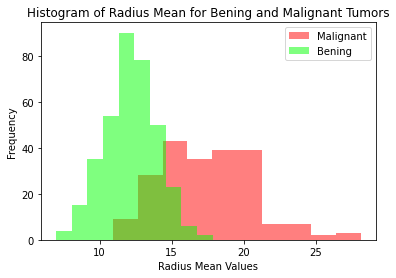

Most frequent malignant radius mean is:  14.382


In [274]:
# Creates a histogram for the times each values has appeared in the dataset, reference: https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners?scriptVersionId=5598734&cellId=6
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,fc = (0,1,0,0.5),label = "Bening")

plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()


frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

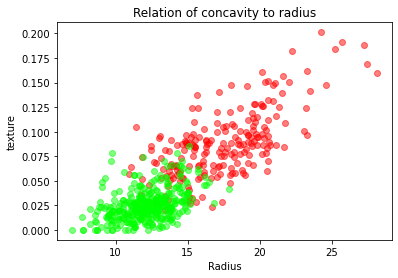

In [275]:
# Creates a scatter plot
plt.xlabel("Radius")
plt.ylabel("texture")
plt.title("Relation of concavity to radius")

colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

x = [data.radius_mean[i] for i in range(data.shape[0]) if data.diagnosis[i] == "M"]
y = [data["concave points_mean"][i] for i in range(data.shape[0]) if data.diagnosis[i] == "M"]
plt.scatter(x, y, color=(1, 0, 0, 0.5))

x = [data.radius_mean[i] for i in range(data.shape[0]) if data.diagnosis[i] == "B"]
y = [data["concave points_mean"][i] for i in range(data.shape[0]) if data.diagnosis[i] == "B"]
plt.scatter(x, y, color=(0, 1, 0, 0.5))

plt.show()

<h3>Conclusions</h3>
1. From this graph, we can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.</br>
2. The bening distribution (green in first graph) is approximately bell-shaped, which is shape of normal distribution (gaussian distribution).</br>


Get the data in variables

In [276]:
y = data.diagnosis.values
x = data.drop(['diagnosis'], axis = 1)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Normalize the data

In [277]:
x = (x - np.min(x))/(np.max(x) - np.min(x)).values
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Split the dataset

Encode

In [278]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y_classes = enc.classes_
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [279]:
from sklearn.model_selection import train_test_split

# Split the training the and test dataset into 50-50 (generally the distribution is 70-30, but 50-50 gives us the best results here)
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.5,
    random_state=42,
)

# Transpose the Y values so that we get the same shape for x and y
y_train = y_train.T
y_test = y_test.T

# Display the current shape
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (284, 30)
x test:  (285, 30)
y train:  (284,)
y test:  (285,)


Train and score the model

In [280]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test, y_test)

0.7277086594764539

Predict the values

In [281]:
def predict(index: int):
    # Get the column
    col_to_predict = x.values[index]

    # Reshape the column in order to fir the prediction class
    col_to_predict = col_to_predict.reshape((1, len(col_to_predict)))

    # Predict
    prediction = reg.predict(col_to_predict)

    # Post process
    prediction = int(round(prediction[0], 0))

    # Decode the label
    prediction = y_classes[prediction]

    # Print o/p
    print(
        "Predicted: "
        + str(prediction)
        + ", Actual: "
        + str(y_classes[y[0]])
        + ", Is correct: "
        + str(y_classes[y[0]] == prediction)
    )

    return prediction


for i in range(100):
    predict(i)


Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: B, Actual: M, Is correct: False
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is correct: True
Predicted: B, Actual: M, Is correct: False
Predicted: B, Actual: M, Is correct: False
Predicted: B, Actual: M, Is correct: False
Predicted: M, Actual: M, Is correct: True
Predicted: M, Actual: M, Is co

/home/praharshb/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/praharshb/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/praharshb/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/praharshb/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/praharshb/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/praharshb/.local/lib/python3.10/site-pa